# 1. Load Data

In [1]:
from sklearn.datasets import load_iris
iris = load_iris()

In [2]:
import pandas as pd

df = pd.DataFrame(data=iris.data, columns =iris.feature_names)
df['target'] = iris.target

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
import numpy as np

np.unique(df['target'])

array([0, 1, 2])

In [4]:
df['target'] = df['target'].map({0: 'setosa', 1:'versicolor', 2:'virginica'})

np.unique(df['target'])

array(['setosa', 'versicolor', 'virginica'], dtype=object)

# 2. EDA

In [5]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
species = np.unique(df['target'])

In [7]:
species

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [9]:
seto = df[df['target']==species[0]]
vers = df[df['target']==species[1]]
virg = df[df['target']==species[2]]

In [10]:
seto.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,50.00000,50.000000,50.000000,50.000000
mean,5.00600,3.428000,1.462000,0.246000
std,0.35249,0.379064,0.173664,0.105386
min,4.30000,2.300000,1.000000,0.100000
25%,4.80000,3.200000,1.400000,0.200000
50%,5.00000,3.400000,1.500000,0.200000
75%,5.20000,3.675000,1.575000,0.300000
max,5.80000,4.400000,1.900000,0.600000


In [11]:
vers.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,50.000000,50.000000,50.000000,50.000000
mean,5.936000,2.770000,4.260000,1.326000
std,0.516171,0.313798,0.469911,0.197753
min,4.900000,2.000000,3.000000,1.000000
25%,5.600000,2.525000,4.000000,1.200000
50%,5.900000,2.800000,4.350000,1.300000
75%,6.300000,3.000000,4.600000,1.500000
max,7.000000,3.400000,5.100000,1.800000


In [12]:
virg.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,50.00000,50.000000,50.000000,50.00000
mean,6.58800,2.974000,5.552000,2.02600
std,0.63588,0.322497,0.551895,0.27465
min,4.90000,2.200000,4.500000,1.40000
25%,6.22500,2.800000,5.100000,1.80000
50%,6.50000,3.000000,5.550000,2.00000
75%,6.90000,3.175000,5.875000,2.30000
max,7.90000,3.800000,6.900000,2.50000


## t-test
* 두 집단 간 평균 차이가 유의한지 검증
  * 가설: seto와 vers의 petal length의 평균은 차이가 없다 
  * p-value < 0.05 면, 가설 기각: seto와 vers의 petal length의 평균은 차이가 존재한다.

In [13]:
import scipy

stat, p_value =scipy.stats.ttest_ind(seto['petal length (cm)'], vers['petal length (cm)'])
p_value


5.404910513441677e-62

In [14]:
if p_value < 0.05:
  print('seto와 vers의 petal length의 평균은 차이가 있다')
else: #p-value > 0.05
  print('seto와 vers의 petal length의 평균은 차이가 없다')

seto와 vers의 petal length의 평균은 차이가 있다


# 3. Data Visualization

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

## Histogram

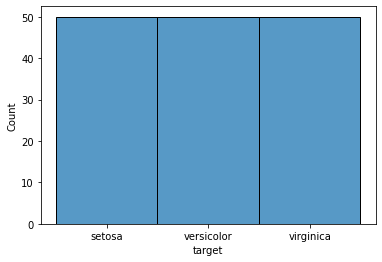

In [16]:
sns.histplot(df['target'])


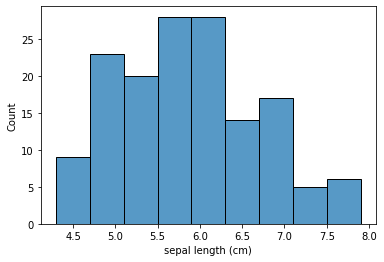

In [17]:
sns.histplot(df['sepal length (cm)'])


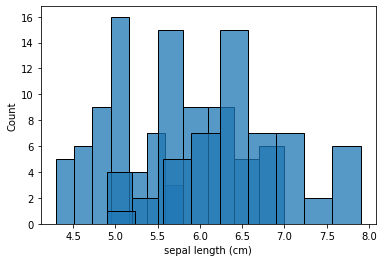

In [18]:
sns.histplot(seto['sepal length (cm)'])
sns.histplot(vers['sepal length (cm)'])
sns.histplot(virg['sepal length (cm)'])

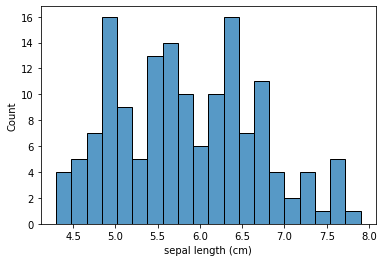

In [19]:
sns.histplot(df['sepal length (cm)'], bins=20)


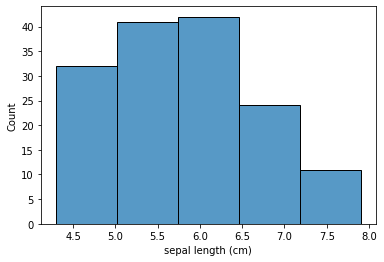

In [20]:
sns.histplot(df['sepal length (cm)'], bins=5)


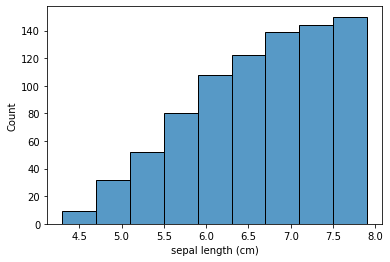

In [21]:
sns.histplot(df['sepal length (cm)'], cumulative=True)


## Pairplot

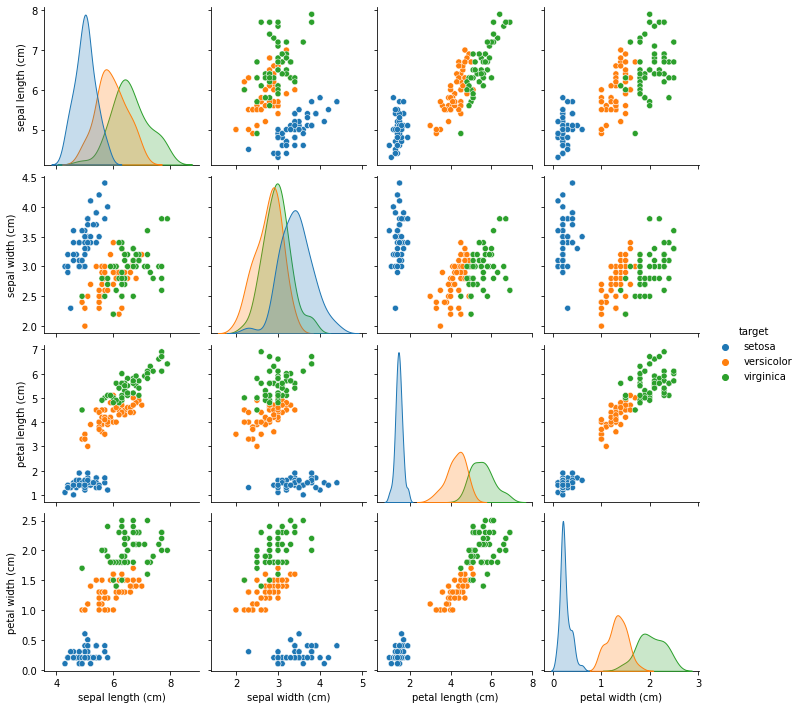

In [22]:
sns.pairplot(df, hue = 'target')


## Box plot

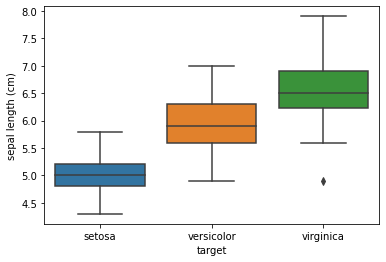

In [23]:
sns.boxplot(x='target', y='sepal length (cm)', data=df)


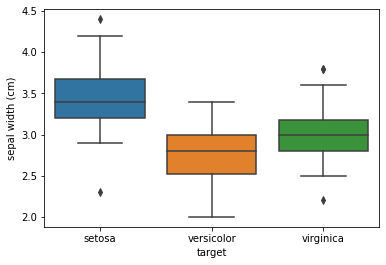

In [24]:
sns.boxplot(x='target', y='sepal width (cm)', data=df)


## Violin plot

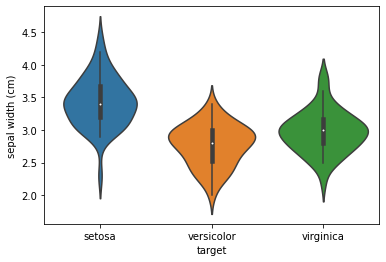

In [25]:
sns.violinplot(x='target', y='sepal width (cm)', data=df)
